# 一、项目介绍
这是泰坦尼克号幸存者数据
# 二、数据整理
## 2.1 加载数据

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn import cross_validation, metrics
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
train = pd.read_csv('train.csv')
train.rename(columns=lambda x: x.lower(), inplace=True)
train.sample(3)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
760,761,0,3,"Garfirth, Mr. John",male,NaN,0,0,358585,14.5000,NaN,S
123,124,1,2,"Webber, Miss. Susan",female,32.5,0,0,27267,13.0000,E101,S
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.0,1,2,SC/Paris 2123,41.5792,NaN,C


## 2.2 查看数据

In [3]:
test = pd.read_csv('test.csv')
test.rename(columns=lambda x: x.lower(), inplace=True)
test.sample(3)

,passengerid,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
344,1236,3,"van Billiard, Master. James William",male,NaN,1,1,A/5. 851,14.50,NaN,S
260,1152,3,"de Messemaeker, Mr. Guillaume Joseph",male,36.5,1,0,345572,17.40,NaN,S
102,994,3,"Foley, Mr. William",male,NaN,0,0,365235,7.75,NaN,Q


train共有12列，test共有11列，前者比后者多一列'servived'用于训练机器学习。其他11列分别为：'PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'

In [4]:
data = pd.concat([train,test])
data.rename(columns=lambda x: x.lower(), inplace=True)
data.sample(5)

,age,cabin,embarked,fare,name,parch,passengerid,pclass,sex,sibsp,survived,ticket
412,28.0,NaN,S,7.7750,"Henriksson, Miss. Jenny Lovisa",0,1304,3,female,0,NaN,347086
806,39.0,A36,S,0.0000,"Andrews, Mr. Thomas Jr",0,807,1,male,0,0.0,112050
552,NaN,NaN,Q,7.8292,"O'Brien, Mr. Timothy",0,553,3,male,0,0.0,330979
417,NaN,NaN,C,22.3583,"Peter, Master. Michael J",1,1309,3,male,1,NaN,2668
321,25.0,F E57,C,7.2292,"Krekorian, Mr. Neshan",0,1213,3,male,0,NaN,2654


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
age            1046 non-null float64
cabin          295 non-null object
embarked       1307 non-null object
fare           1308 non-null float64
name           1309 non-null object
parch          1309 non-null int64
passengerid    1309 non-null int64
pclass         1309 non-null int64
sex            1309 non-null object
sibsp          1309 non-null int64
survived       891 non-null float64
ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


从上可见，数据集包含12个变量，1309条数据，其中891条为训练数据，418条为测试数据

age 浮点数变量，标识乘客年龄，有缺失值

cabin 字符型，代表乘客所在的舱位，有缺失值  

embarked 字符型，代表乘客登船口岸，适合转换为factor型变量 

fare 浮点数变量，代表乘客的船票价  

name 字符型变量，除包含姓和名以外，还包含Mr. Mrs. Dr.这样的具有西方文化特点的信息  

parch 整型变量，代表父母或子女的个数。其中Par代表Parent也即父母，Ch代表Child也即子女  

passengerId 整型变量，标识乘客的ID，递增变量，对预测无帮助  

pclass 整型变量，标识乘客的社会-经济状态，1代表Upper，2代表Middle，3代表Lower  

sex 字符型变量，标识乘客性别，适合转换为整型变量

sibsp 整型变量，代表兄弟姐妹及配偶的个数。其中Sib代表Sibling也即兄弟姐妹，Sp代表Spouse也即配偶

survived 浮点数变量，标识该乘客是否幸存。0.0表示遇难，1.0表示幸存。需要转换为整型变量。 

ticket 字符型变量，代表乘客的船票信息  

In [6]:
age = pd.DataFrame(data['age'].value_counts())

In [7]:
data.isnull().sum()

age             263
cabin          1014
embarked          2
fare              1
name              0
parch             0
passengerid       0
pclass            0
sex               0
sibsp             0
survived        418
ticket            0
dtype: int64

#### 数据概况  
训练数据和测试数据共1309条。  
其中age缺失值263条，cabin缺失1014条，缺失较为严重。embarked缺失2个，fare缺失一条数据。

In [8]:
data.describe()

,age,fare,parch,passengerid,pclass,sibsp,survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


#### 乘客概况：  
年龄范围0-80岁，平均年龄30岁左右，；  
大部分乘客没有携带家属；  
票价范围0-512美元，只有极少量购买了512的船票；    
1等船仓、2等船仓人数同样较少，3等船仓人数占比过半；  
约有38%地人最终获救。

# 三、数据可视化

## 3.1女性幸存率远高于男性

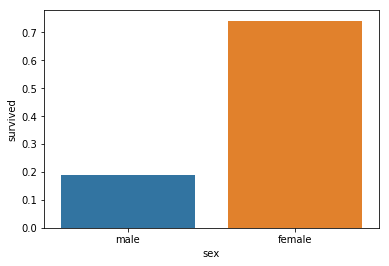

In [9]:
sb.barplot(data=train, x='sex', y='survived', ci= None);

女性幸存率为74%，男性幸村率为19%。可见女性幸村率远高于男性。

## 3.2船舱等级越高，幸存率越高

In [10]:
df_pclass = train[['survived','pclass']].groupby('pclass').mean()
df_pclass

,survived
pclass,
1,0.629630
2,0.472826
3,0.242363


1、2、3等船舱幸存率分别为63.0%、47.3%、24%。

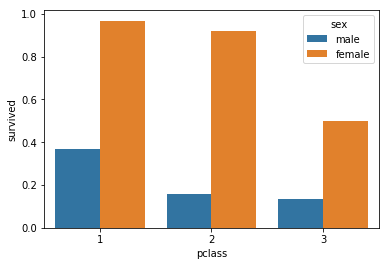

In [11]:
sb.barplot(data=train,x='pclass',y='survived',hue='sex',ci=None)

从幸存者分析，第一遵循女性优先的原则，因此1，2等船舱分别由97%、92%的女性获救，而第三等船舱女性获救比例为50%（后续分析三等船舱获救者特征）；  

In [12]:
survived = train[train['survived'] ==1][train['pclass'] ==3][train['sex'] =='female']
unlucky = train[train['survived'] ==0][train['pclass'] ==3][train['sex'] =='female'];

In [13]:
survived.describe()

,passengerid,survived,pclass,age,sibsp,parch,fare
count,72.000000,72.0,72.0,47.000000,72.000000,72.000000,72.000000
mean,359.083333,1.0,3.0,19.329787,0.500000,0.500000,12.464526
std,266.188419,0.0,0.0,12.303246,0.888106,0.919277,5.984714
min,3.000000,1.0,3.0,0.750000,0.000000,0.000000,7.225000
25%,138.750000,1.0,3.0,13.500000,0.000000,0.000000,7.750000
50%,322.500000,1.0,3.0,19.000000,0.000000,0.000000,9.468750
75%,563.500000,1.0,3.0,26.500000,1.000000,1.000000,15.912500
max,876.000000,1.0,3.0,63.000000,4.000000,5.000000,31.387500


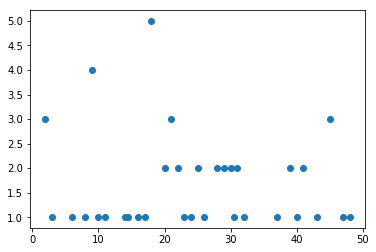

In [14]:
a = unlucky['age'].value_counts()
b = survived['age'].value_counts()
plt.scatter(a.index,a);
#plt.scatter(b.index,b);

## 3.3幸存者与年龄的关系

NameError: name 'data1' is not defined

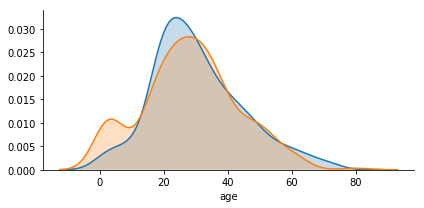

In [15]:
facet = sb.FacetGrid(train, hue="survived",aspect=2)
facet.map(sb.kdeplot,'age',shade= True)
facet.set(xlim=(0, data1['age'].max()))
facet.add_legend();

未成年幸存者幸村率高于成年人。

## 3.4幸存者与家庭组成的关系

In [ ]:
base_color = sb.color_palette()[0]
sb.barplot(x="sibsp", y="survived", data=train, ci=None,color=base_color);

配偶及兄弟姐妹数适中的乘客幸存率更高。

## 3.5幸存者与支出船票的关系

In [ ]:
facet = sb.FacetGrid(train, hue="survived",aspect=2)
facet.map(sb.kdeplot,'fare',shade= True)
facet.set(xlim=(0, train['fare'].max()))
facet.add_legend();

支付船票费越高的乘客幸存率更高。

## 3.5不同称呼的乘客幸存率差异
新增title特征，从姓名中提取乘客的称呼，归纳为六类。

In [ ]:
train['title'] = train['name'].apply(lambda x:x.split(',')[1].split('.')[0].strip())
Title_Dict = {}
Title_Dict.update(dict.fromkeys(['Capt', 'Col', 'Major', 'Dr', 'Rev'], 'Officer'))
Title_Dict.update(dict.fromkeys(['Don', 'Sir', 'the Countess', 'Dona', 'Lady'], 'Royalty'))
Title_Dict.update(dict.fromkeys(['Mme', 'Ms', 'Mrs'], 'Mrs'))
Title_Dict.update(dict.fromkeys(['Mlle', 'Miss'], 'Miss'))
Title_Dict.update(dict.fromkeys(['Mr'], 'Mr'))
Title_Dict.update(dict.fromkeys(['Master','Jonkheer'], 'Master'))
train['title'] = train['title'].map(Title_Dict)
sb.barplot(x="title", y="survived", data=train, ci=None,color=base_color);

父母与子女数适中的乘客幸存率更高。

# 四、数据清洗
## 4.1缺失值填充

**Age Feature**：Age缺失量为263，缺失量较大，用Sex, Title, Pclass三个特征构建随机森林模型，填充年龄缺失值。

In [ ]:
data['title'] = data['name'].apply(lambda x:x.split(',')[1].split('.')[0].strip())
Title_Dict = {}
Title_Dict.update(dict.fromkeys(['Capt', 'Col', 'Major', 'Dr', 'Rev'], 'Officer'))
Title_Dict.update(dict.fromkeys(['Don', 'Sir', 'the Countess', 'Dona', 'Lady'], 'Royalty'))
Title_Dict.update(dict.fromkeys(['Mme', 'Ms', 'Mrs'], 'Mrs'))
Title_Dict.update(dict.fromkeys(['Mlle', 'Miss'], 'Miss'))
Title_Dict.update(dict.fromkeys(['Mr'], 'Mr'))
Title_Dict.update(dict.fromkeys(['Master','Jonkheer'], 'Master'))
data['title'] = data['title'].map(Title_Dict)

In [ ]:
age_df = data[['age', 'pclass','sex','title']]
age_df=pd.get_dummies(age_df)
known_age = age_df[age_df.age.notnull()].as_matrix()
unknown_age = age_df[age_df.age.isnull()].as_matrix()
y = known_age[:, 0]
X = known_age[:, 1:]
rfr = RandomForestRegressor(random_state=0, n_estimators=100, n_jobs=-1)
rfr.fit(X, y)
predictedAges = rfr.predict(unknown_age[:, 1::])
data.loc[ (data.age.isnull()), 'age' ] = predictedAges 

**Embarked Feature**：Embarked缺失量为2，缺失Embarked信息的乘客的Pclass均为1，且Fare均为80，因为Embarked为C且Pclass为1的乘客的Fare中位数为80，所以缺失值填充为C。

In [ ]:
data[data['embarked'].isnull()]

In [ ]:
sb.boxplot(x="embarked", y="fare", hue="pclass",data=data, color=base_color);

In [ ]:
data['embarked'] = data['embarked'].fillna('C')

**Fare Feature**：fare缺失量为1，缺失fare信息的乘客的embarked为S，pclass为3，所以用embarked为S，pclass为3的乘客的Fare中位数填充。

In [ ]:
fare=data[(data['embarked'] == "S") & (data['pclass'] == 3)].fare.median()
data['fare']=data['fare'].fillna(fare)

照抄无用，带进一步学习后进行学习完善。[https://zhuanlan.zhihu.com/p/33733586](https://zhuanlan.zhihu.com/p/33733586)